In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import get_coverages
import importlib
importlib.reload(get_coverages)

<module 'get_coverages' from '/raj-test/coverage_from_fragments/get_coverages.py'>

In [23]:
%%time
intervals = get_coverages.get_coverages('chr11', 118202327, 118226182, 'example.bed.gz', 'grouping_table.txt') 

Tabix query took 0.40s
groupBy cluster took 0.01s
filtering reads took 0.10s
merging groups with reads took 0.11s
expanding reads to bp resolution took 230.11s
getting scores per bp took 327.47s
Total processing took 557.80s
CPU times: user 1min 26s, sys: 771 ms, total: 1min 27s
Wall time: 9min 19s


In [25]:
intervals.head()

,chrom,start,end,group,normalized_total
0,chr11,118202415,118202416,3,7.392425e-08
1,chr11,118202416,118202417,3,7.392425e-08
2,chr11,118202417,118202418,3,7.392425e-08
3,chr11,118202418,118202419,3,7.392425e-08
4,chr11,118202419,118202420,3,7.392425e-08


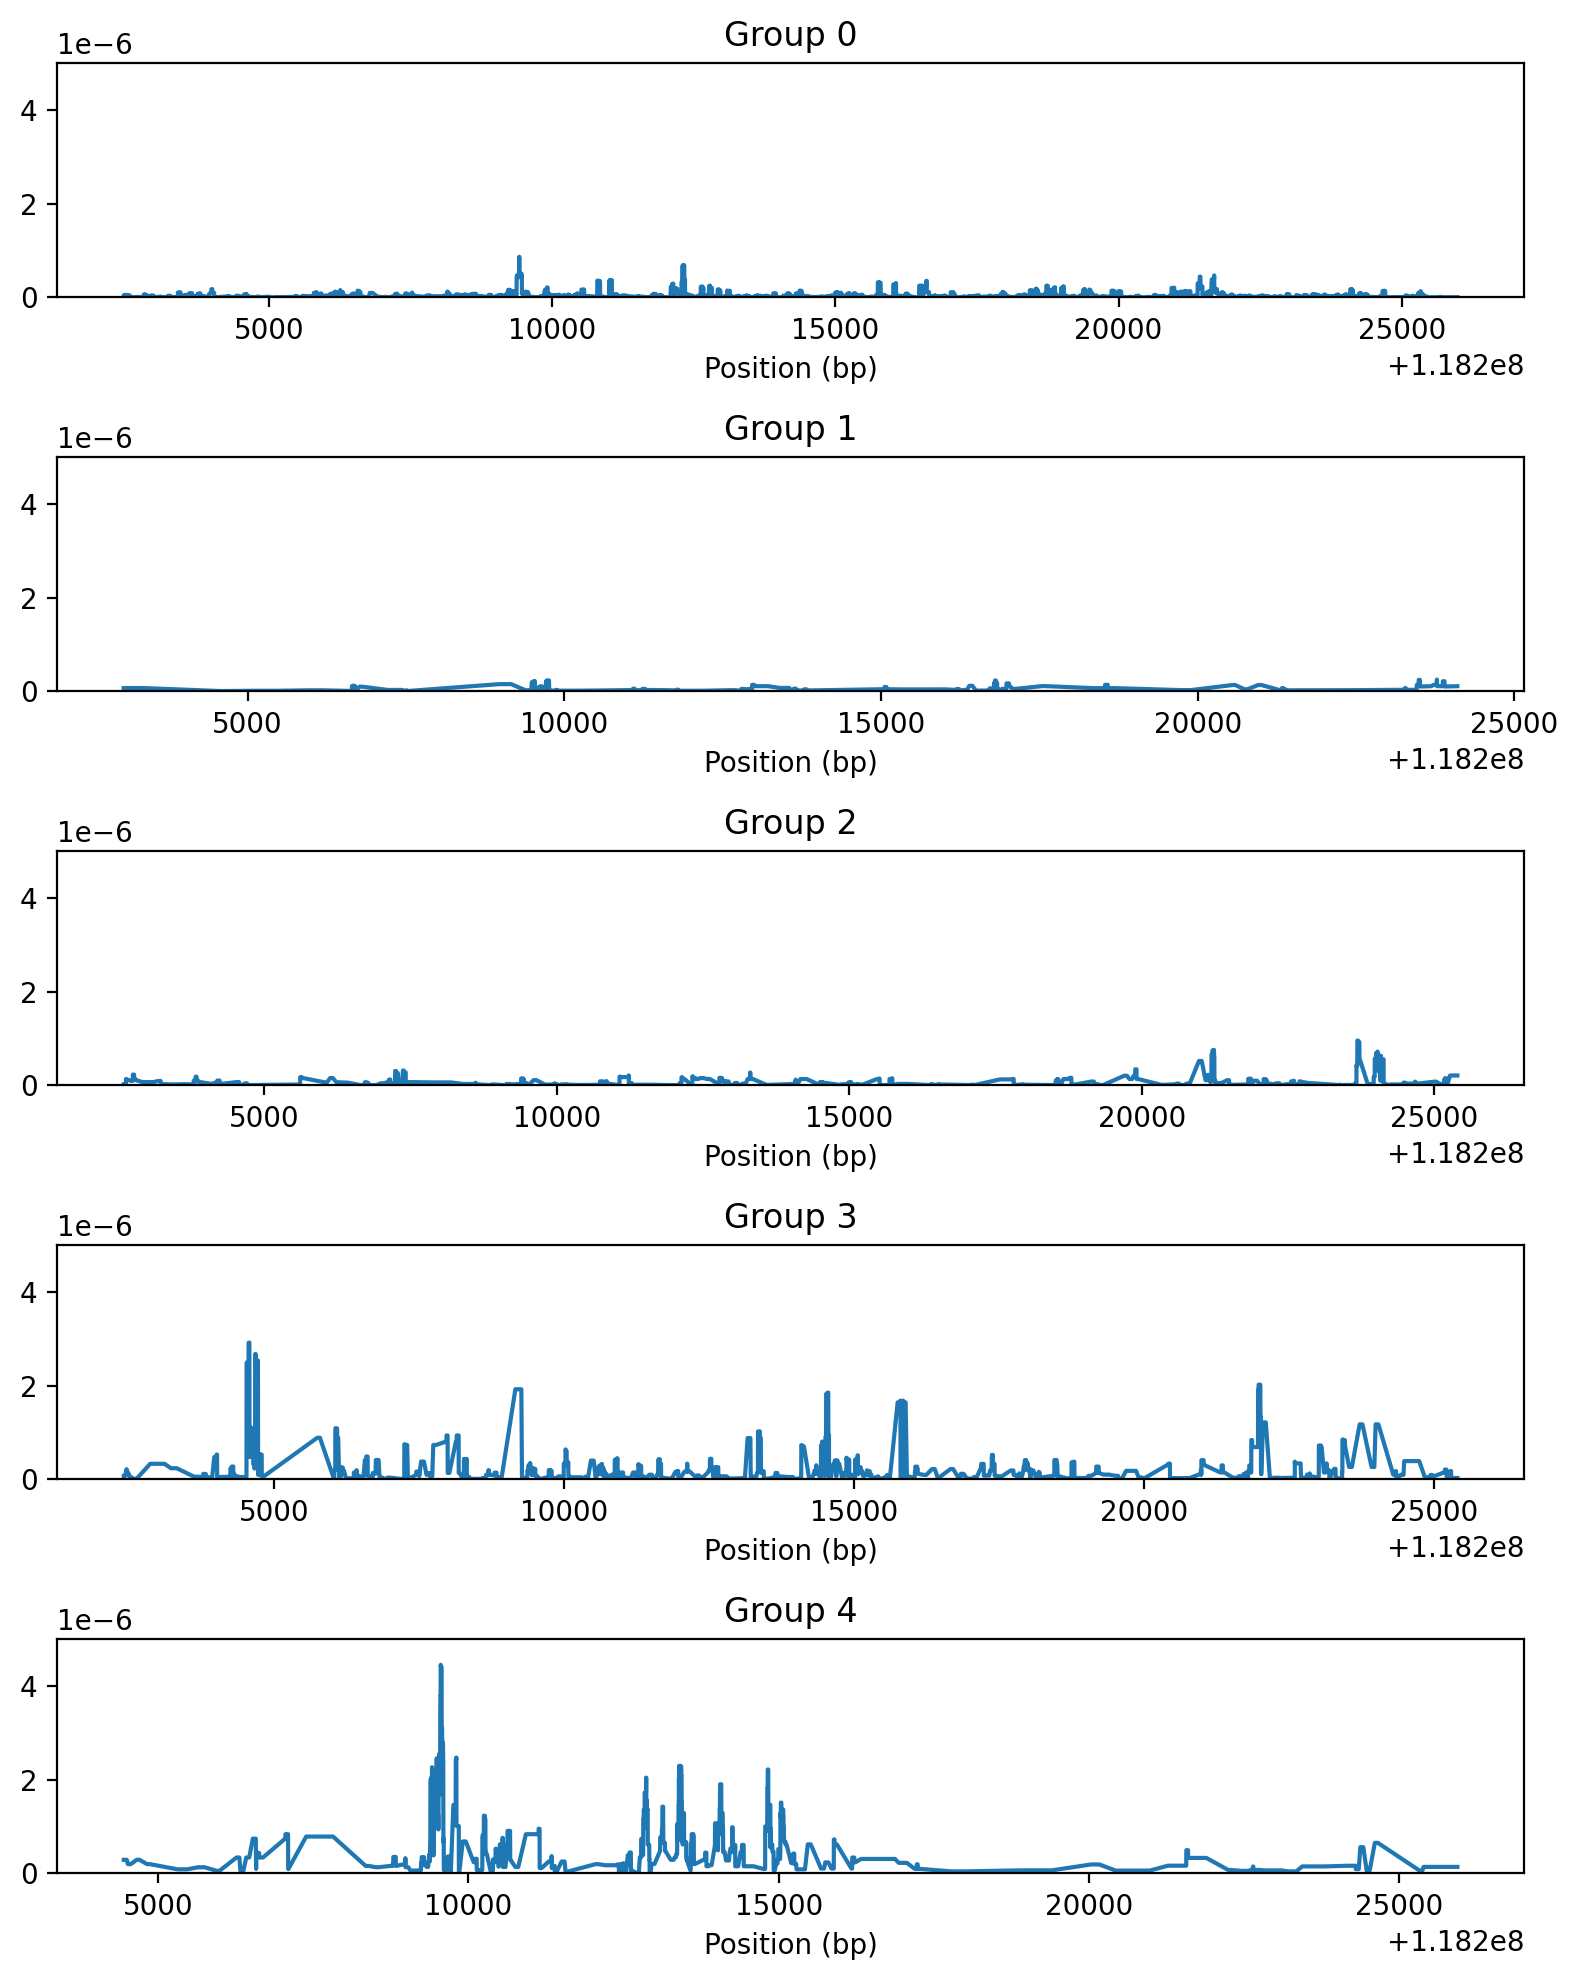

In [24]:
groups = np.unique(intervals['group'])
n_groups = len(groups)

fig, axs = plt.subplots(nrows = n_groups, ncols = 1, figsize = (8, 2*n_groups), dpi=200)

for (i, group) in enumerate(groups):
    df_group = intervals.loc[intervals['group'] == group]
    axs[i].plot(df_group['start'], df_group['normalized_total'])
    axs[i].set_title(f'Group {i}')
    axs[i].set_ylim([0.0, 5e-6])
    axs[i].set_xlabel('Position (bp)')

plt.tight_layout()
plt.show()